# GPT 4o with v2.17 prompt

This notebook outlines the steps undertook to generate a prediction using GPT 4o with prompt from 2/17/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import claude_instructions_v217
MODEL_ID = "gpt-4o-2024-11-20"
SYSTEM_PROMPT = claude_instructions_v217

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
len(df)

1084

In [3]:
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 6
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 5
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 7
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 50.4 s, sys: 4.26 s, total: 54.7 s
Wall time: 11min 43s


[{'0005.91306_cites_88693.txt': {'model': 'gpt-4o-2024-11-20',
   'input_tokens': 2239,
   'output_tokens': 86,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage discusses the Target Case, Huntington v. Texas, and references prior decisions and their implications. However, there is no explicit or implicit indication that the Acting Case overrules the Target Case. The passage merely analyzes and applies the principles from the Target Case without taking any Negative Actions against it.',
   'raw_results': '{\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The passage discusses the Target Case, Huntington v. Texas, and references prior decisions and their implications. However, there is no explicit or implicit indication that the Acting Case overrules the Target Case. The passage merely analyzes and applies the principles from the Target Case without taking any Negative Actions against it."\n}'}},
 {'0004.91306_cites_88240.txt': {'model': 'gpt-4o-20

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0005.91306_cites_88693.txt,gpt-4o-2024-11-20,2239,86,no,0.95,"The passage discusses the Target Case, Hunting...","{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
1,0004.91306_cites_88240.txt,gpt-4o-2024-11-20,2237,86,no,0.95,"The passage discusses the Target Case, Texas v...","{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0002.91306_cites_88994.txt,gpt-4o-2024-11-20,2724,90,no,0.95,The Acting Case discusses the Target Case (Ver...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0003.91306_cites_87633.txt,gpt-4o-2024-11-20,2261,99,no,0.95,The passage discusses the Target Case (Murray ...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
4,0001.91306_cites_88061.txt,gpt-4o-2024-11-20,3010,125,yes,0.98,The passage explicitly states that the origina...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.98..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/6.gpt/5.gpt4o_v217_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/6.gpt/5.gpt4o_v217_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,gpt-4o-2024-11-20,3010,125,yes,0.98,The passage explicitly states that the origina...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.98..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,gpt-4o-2024-11-20,2724,90,no,0.95,The Acting Case discusses the Target Case (Ver...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,gpt-4o-2024-11-20,2261,99,no,0.95,The passage discusses the Target Case (Murray ...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,gpt-4o-2024-11-20,2237,86,no,0.95,"The passage discusses the Target Case, Texas v...","{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,gpt-4o-2024-11-20,2239,86,no,0.95,"The passage discusses the Target Case, Hunting...","{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     932
yes    152
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

3626535

In [16]:
eval_df["output_tokens"].sum()

112956

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.97      0.96      0.96       935
         Yes       0.77      0.79      0.78       149

    accuracy                           0.94      1084
   macro avg       0.87      0.87      0.87      1084
weighted avg       0.94      0.94      0.94      1084



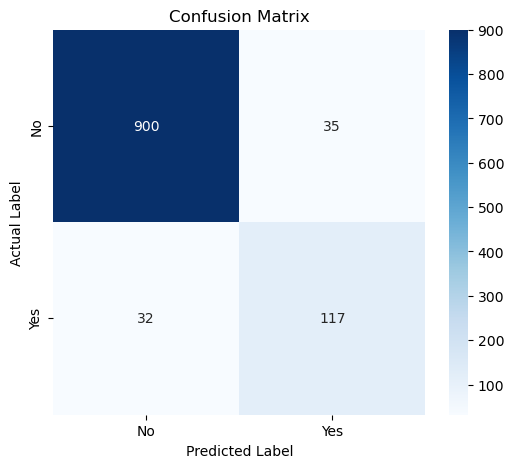

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.94
Precision: 0.77
Recall: 0.79
F-score: 0.78
Specificity: 0.96
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 117
True negatives: 900
False positives: 35
False negatives: 32


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

35

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

32

# Save the evaluation df

In [23]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,gpt-4o-2024-11-20,3010,125,yes,0.98,The passage explicitly states that the origina...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.98..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,gpt-4o-2024-11-20,2724,90,no,0.95,The Acting Case discusses the Target Case (Ver...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,gpt-4o-2024-11-20,2261,99,no,0.95,The passage discusses the Target Case (Murray ...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,gpt-4o-2024-11-20,2237,86,no,0.95,"The passage discusses the Target Case, Texas v...","{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,gpt-4o-2024-11-20,2239,86,no,0.95,"The passage discusses the Target Case, Hunting...","{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."


In [24]:
eval_df.to_csv("predictions/6.gpt/5.gpt4o_v217_prompt_eval.csv", index=False)